This notebook contains eample showing how to do a tweedie GLM in both keras and tensorflow probability GLM framework and exactly tie out the results to the cononical implementation in statsmodels.

Let's look at how to properly use the tweedie distribution in python. This distribution is widely used in modeling the compound distrubtion of insurance loss data or pure_premium = (frequency * severity)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.seed(333)
n = 1_000_000
df = pd.DataFrame({"a": np.random.random(size=n), "b": np.random.random(size=n)})
wts = np.array([0.1, 0.5])
df['mu'] = (df.values * wts).sum(axis=1)

In [5]:
df.describe()

,a,b,mu
count,1.000000e+06,1000000.000000,1000000.000000
mean,4.998997e-01,0.499766,0.299873
std,2.886461e-01,0.288896,0.147322
min,5.261994e-07,0.000002,0.000442
25%,2.500926e-01,0.249347,0.174608
50%,4.999727e-01,0.499685,0.299761
75%,7.498688e-01,0.750379,0.425083
max,9.999947e-01,0.999996,0.599721


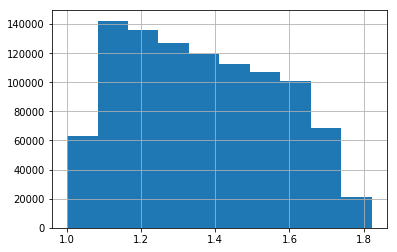

In [7]:
df.mu.apply(np.exp).hist()

(0.2998729949171409, 1.3647940994877645, 3.251398071016258, 10.392304845413264)

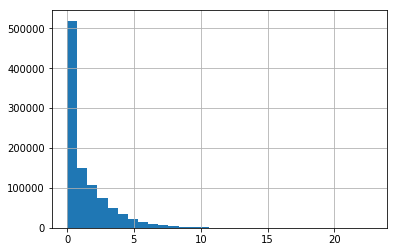

In [8]:
np.random.seed(seed=32)

def rtweedie(n,p,mu,phi):
    #checking the value of variance power between 1-2
    if not 1 < p < 2:
        raise ValueError()
        
    #rt=np.full(n,np.nan)
    # calculating mean of poisson distribution
    lambdaa=mu**(2-p)/(phi*(2-p))
    # shape parameter of gamma distribution
    alpha=(2-p)/(1-p)
    # scale parameter of gamma distribution
    gam= phi*(p-1)*(mu**(p-1))
    # Generating Poisson random sample
    N=np.random.poisson(lambdaa,n)
    #for i in range(n):
    # Generate single data point of gamma distribution using poisson random variable
    rt=np.random.gamma(N*np.abs(alpha),gam,n)
    return(rt)

sample = rtweedie(len(df), 1.5, np.exp(df["mu"]), 2)
pd.Series(sample).hist(bins=30)
df["mu"].mean(), sample.mean(), sample.var(), 2*3**1.5

In [9]:
df["loss"] = sample

In [10]:
df["loss"].describe()

count    1000000.000000
mean           1.364794
std            1.803164
min            0.000000
25%            0.000000
50%            0.678980
75%            2.068765
max           22.774076
Name: loss, dtype: float64

In [11]:
import statsmodels.api as sm

mod2 = sm.GLM(
    df['loss'], sm.add_constant(df[["a", "b"]]), 
    family=sm.families.Tweedie(sm.genmod.families.links.log(), var_power=1.5)
)

mod2 = mod2.fit()

mod2.summary()

/home/thenome/horsevid/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   loss   No. Observations:              1000000
Model:                            GLM   Df Residuals:                   999997
Model Family:                 Tweedie   Df Model:                            2
Link Function:                    log   Scale:                          1.9990
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 16 Apr 2019   Deviance:                   2.3925e+06
Time:                        20:46:43   Pearson chi2:                 2.00e+06
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.004      1.294      0.196      -0.002       0.012
a              0.0965      0.005     21.268      0.000       0.088       0.105
b              0.4954      0.005    109.090      0.000       0.486       0.504
==============================================================================
"""

In [12]:
import statsmodels.api as sm

mod1 = sm.GLM(
    df['loss'], sm.add_constant(df[["a", "b"]]), 
    family=sm.families.Tweedie(sm.genmod.families.links.log(), var_power=1.5)
)

mod1 = mod1.fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   loss   No. Observations:              1000000
Model:                            GLM   Df Residuals:                   999997
Model Family:                 Tweedie   Df Model:                            2
Link Function:                    log   Scale:                          1.9990
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 16 Apr 2019   Deviance:                   2.3925e+06
Time:                        20:46:46   Pearson chi2:                 2.00e+06
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.004      1.294      0.196      -0.002       0.012
a              0.0965      0.005     21.268      0.000       0.088       0.105
b              0.4954      0.005    109.090      0.000       0.486       0.504
==============================================================================
"""

In [13]:
import statsmodels.api as sm

mod = sm.GLM(
    df["loss"], sm.add_constant(df[["a", "b"]]),
    family=sm.families.Poisson()
)

mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   loss   No. Observations:              1000000
Model:                            GLM   Df Residuals:                   999997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7983e+06
Date:                Tue, 16 Apr 2019   Deviance:                   2.0575e+06
Time:                        20:47:10   Pearson chi2:                 2.33e+06
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.002      1.788      0.074      -0.000       0.009
a              0.0967      0.003     32.606      0.000       0.091       0.103
b              0.4958      0.003    166.325      0.000       0.490       0.502
==============================================================================
"""

In [14]:
df["ep"] = mod1.predict(sm.add_constant(df[["a", "b"]]))

(df["loss"] / df["ep"]).mean()

1.0000052053542834

In [15]:
import statsmodels.api as sm

mod = sm.GLM(
    (df["loss"] / df["ep"]), sm.add_constant(df[["a", "b"]]), 
    offset=np.log(df["ep"]),
    family=sm.families.Tweedie(sm.genmod.families.links.log(), var_power=1.5)
)

mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              1000000
Model:                            GLM   Df Residuals:                   999997
Model Family:                 Tweedie   Df Model:                            2
Link Function:                    log   Scale:                          1.7250
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 16 Apr 2019   Deviance:                   2.0624e+06
Time:                        20:47:13   Pearson chi2:                 1.72e+06
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.003     -1.224      0.221      -0.011       0.003
a             -0.0967      0.005    -21.252      0.000      -0.106      -0.088
b             -0.4958      0.005   -109.063      0.000      -0.505      -0.487
==============================================================================
"""

In [16]:
from tensorflow import keras

def tweedie_dev_resids(y_true, y_pred, p=1.5):
    return 2.*((y_true**(2. - p))/((1. - p) * (2. - p)) - (y_true * (y_pred**(1. - p)))/(1. - p) + (y_pred**(2. - p))/(2.-p))

inl = keras.layers.Input((3,))
out = keras.layers.Dense(1, use_bias=False)(inl)
out = keras.layers.Lambda(lambda x: keras.backend.exp(x))(out)
model = keras.models.Model(inl, out)

model.compile(keras.optimizers.Adam(1e-3), tweedie_dev_resids)
model.summary()
model.fit(sm.add_constant(df[["a", "b"]]), df["loss"])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/home/thenome/horsevid/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


1000000/1000000 [==============================] - 18s 18us/sample - loss: 2.4244


In [17]:
model.get_weights()[0].ravel()

array([0.01090728, 0.0948837 , 0.5085655 ], dtype=float32)

In [18]:
%%time
import tensorflow as tf
import tensorflow_probability as tfp

Y = tf.convert_to_tensor(df["loss"].values)
X = tf.convert_to_tensor(sm.add_constant(df[["a", "b"]]).values)

w, linear_response, is_converged, num_iter = tfp.glm.fit(
    X,
    Y,
    tfp.glm.Poisson(),
)
log_likelihood = tfp.glm.Poisson().log_prob(Y, linear_response)

print(w, linear_response, is_converged, num_iter)
w_true = tf.convert_to_tensor(np.array([0.1, 0.5]))

with tf.Session() as sess:
    [w_, linear_response_, is_converged_, num_iter_, Y_, w_true_, log_likelihood_] = sess.run([
        w, linear_response, is_converged, num_iter, Y, w_true, log_likelihood
    ])

print('is_converged: ', is_converged_)
print('    num_iter: ', num_iter_)
print('    accuracy: ', np.mean((linear_response_ > 0.) == Y_))
print('    deviance: ', 2. * np.mean(log_likelihood_))

with tf.Session() as sess:
    print(w.eval(), w_true.eval())


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



/home/thenome/horsevid/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Tensor("fit/while/Exit_2:0", shape=(3,), dtype=float64) Tensor("fit/while/Exit_3:0", shape=(1000000,), dtype=float64) Tensor("fit/while/Exit:0", shape=(), dtype=bool) Tensor("fit/while/Exit_1:0", shape=(), dtype=int32)
is_converged:  True
    num_iter:  5
    accuracy:  0.0
    deviance:  -3.596642530387179
[0.00423228 0.0967199  0.4958137 ] [0.1 0.5]
CPU times: user 4.83 s, sys: 498 ms, total: 5.32 s
Wall time: 3.77 s


In [30]:
class TWD(tfp.glm.ExponentialFamily):

    _is_canonical = True

    def _call(self, r):
        mean = grad_mean = tf.exp(r)
        var_power = 1.
        p = 1.5
        variance = var_power * tf.pow(mean, p)
        #variance = mean
        return mean, variance, grad_mean

    def _log_prob(self, y, r):
        #return tfd.Poisson(log_rate=r).log_prob(y)
        return 1./2.*tweedie_dev_resids(y, tf.exp(r))

In [21]:
import tensorflow as tf
import tensorflow_probability as tfp

Y = tf.convert_to_tensor(df["loss"].values)
X = tf.convert_to_tensor(sm.add_constant(df[["a", "b"]]).values)

w, linear_response, is_converged, num_iter = tfp.glm.fit(
    X,
    Y,
    TWD(),
)
log_likelihood = TWD().log_prob(Y, linear_response)

print(w, linear_response, is_converged, num_iter)
w_true = tf.convert_to_tensor(np.array([0.1, 0.5]))

with tf.Session() as sess:
    [w_, linear_response_, is_converged_, num_iter_, Y_, w_true_, log_likelihood_] = sess.run([
        w, linear_response, is_converged, num_iter, Y, w_true, log_likelihood
    ])

print('is_converged: ', is_converged_)
print('    num_iter: ', num_iter_)
print('    deviance: ', np.sum(log_likelihood_) * 2.)

with tf.Session() as sess:
    print(w.eval(), w_true.eval())
    w = w.eval()
    Y, Y_ = Y.eval(), Y_

Tensor("fit_1/while/Exit_2:0", shape=(3,), dtype=float64) Tensor("fit_1/while/Exit_3:0", shape=(1000000,), dtype=float64) Tensor("fit_1/while/Exit:0", shape=(), dtype=bool) Tensor("fit_1/while/Exit_1:0", shape=(), dtype=int32)
is_converged:  True
    num_iter:  5
    deviance:  2392510.349981588
[0.00458041 0.0965176  0.49535061] [0.1 0.5]


In [22]:
mod1.params.values, mod2.params.values

(array([0.00458041, 0.0965176 , 0.49535061]),
 array([0.00458041, 0.0965176 , 0.49535061]))

In [23]:
y_pred=np.exp((sm.add_constant(df[["a", "b"]]).values * w).sum(axis=1))

In [25]:
log_likelihood_.sum()*2,tweedie_dev_resids(Y, y_pred).sum()

(2392510.349981588, 2392510.349981588)

In [26]:
tweedie_dev_resids(Y, y_pred).sum()

2392510.349981588

In [27]:
pd.Series(y_pred).describe()

count    1000000.000000
mean           1.364787
std            0.198687
min            1.005028
25%            1.192778
50%            1.350233
75%            1.528743
max            1.815167
dtype: float64

In [28]:
mod1.deviance, mod2.deviance

(2392510.3499815874, 2392510.3499815874)

In [29]:
y_pred_=mod1.predict(sm.add_constant(df[["a", "b"]]))
tweedie_dev_resids(df["loss"], y_pred_).sum()

2392510.3499815874

In [147]:
pd.Series(y_pred_).describe()

count    1000000.000000
mean           1.364787
std            0.198687
min            1.005028
25%            1.192778
50%            1.350233
75%            1.528743
max            1.815167
dtype: float64